In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,15]

In [4]:
os.getcwd()

'C:\\Users\\suchi\\Documents\\ELTE\\Semester 1\\Intro to DS\\Jupyter\\BinarySplice\\notebook'

In [5]:
data = pd.read_csv('..\\rawdata\splice.txt',delimiter=" ",header=None,prefix='X')
data_scaled = pd.read_csv('..\\rawdata\splice_scale.txt',delimiter=" ",header=None,prefix='X')
data_test = pd.read_csv('..\\rawdata\splice_t.txt',delimiter=" ",header=None,prefix='X')

In [44]:
df = data.copy()
dfs = data_scaled.copy()
dft = data_test.copy()

## Data Exploration

In [7]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
0,1,1:2.000000,2:1.000000,3:2.000000,4:1.000000,5:2.000000,6:1.000000,7:2.000000,8:3.000000,9:3.000000,...,52:3.000000,53:4.000000,54:2.000000,55:2.000000,56:2.000000,57:2.000000,58:1.000000,59:3.000000,60:4.000000,NaN
1,1,1:1.000000,2:3.000000,3:3.000000,4:4.000000,5:2.000000,6:1.000000,7:2.000000,8:2.000000,9:4.000000,...,52:3.000000,53:4.000000,54:4.000000,55:4.000000,56:1.000000,57:3.000000,58:4.000000,59:1.000000,60:1.000000,NaN
2,1,1:1.000000,2:4.000000,3:1.000000,4:4.000000,5:4.000000,6:4.000000,7:4.000000,8:1.000000,9:1.000000,...,52:1.000000,53:1.000000,54:4.000000,55:2.000000,56:2.000000,57:4.000000,58:4.000000,59:4.000000,60:2.000000,NaN
3,-1,1:1.000000,2:1.000000,3:4.000000,4:1.000000,5:1.000000,6:3.000000,7:3.000000,8:4.000000,9:4.000000,...,52:3.000000,53:4.000000,54:1.000000,55:3.000000,56:3.000000,57:4.000000,58:2.000000,59:2.000000,60:1.000000,NaN
4,-1,1:4.000000,2:3.000000,3:4.000000,4:4.000000,5:3.000000,6:1.000000,7:1.000000,8:4.000000,9:4.000000,...,52:3.000000,53:2.000000,54:1.000000,55:4.000000,56:2.000000,57:1.000000,58:1.000000,59:4.000000,60:4.000000,NaN


In [8]:
dfs.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
0,1,1:-0.333333,2:-1,3:-0.333333,4:-1,5:-0.333333,6:-1,7:-0.333333,8:0.333333,9:0.333333,...,52:0.333333,53:1,54:-0.333333,55:-0.333333,56:-0.333333,57:-0.333333,58:-1,59:0.333333,60:1,NaN
1,1,1:-1,2:0.333333,3:0.333333,4:1,5:-0.333333,6:-1,7:-0.333333,8:-0.333333,9:1,...,52:0.333333,53:1,54:1,55:1,56:-1,57:0.333333,58:1,59:-1,60:-1,NaN
2,1,1:-1,2:1,3:-1,4:1,5:1,6:1,7:1,8:-1,9:-1,...,52:-1,53:-1,54:1,55:-0.333333,56:-0.333333,57:1,58:1,59:1,60:-0.333333,NaN
3,-1,1:-1,2:-1,3:1,4:-1,5:-1,6:0.333333,7:0.333333,8:1,9:1,...,52:0.333333,53:1,54:-1,55:0.333333,56:0.333333,57:1,58:-0.333333,59:-0.333333,60:-1,NaN
4,-1,1:1,2:0.333333,3:1,4:1,5:0.333333,6:-1,7:-1,8:1,9:1,...,52:0.333333,53:-0.333333,54:-1,55:1,56:-0.333333,57:-1,58:-1,59:1,60:1,NaN


In [9]:
dft.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
0,-1,1:3.000000,2:3.000000,3:1.000000,4:2.000000,5:3.000000,6:4.000000,7:4.000000,8:3.000000,9:3.000000,...,52:1.000000,53:3.000000,54:4.000000,55:4.000000,56:4.000000,57:3.000000,58:3.000000,59:1.000000,60:1.000000,NaN
1,-1,1:1.000000,2:4.000000,3:4.000000,4:3.000000,5:3.000000,6:1.000000,7:1.000000,8:1.000000,9:1.000000,...,52:1.000000,53:1.000000,54:2.000000,55:4.000000,56:1.000000,57:2.000000,58:1.000000,59:2.000000,60:1.000000,NaN
2,1,1:4.000000,2:2.000000,3:1.000000,4:4.000000,5:2.000000,6:1.000000,7:2.000000,8:3.000000,9:4.000000,...,52:4.000000,53:2.000000,54:4.000000,55:3.000000,56:3.000000,57:3.000000,58:4.000000,59:2.000000,60:2.000000,NaN
3,-1,1:2.000000,2:2.000000,3:3.000000,4:2.000000,5:2.000000,6:4.000000,7:4.000000,8:3.000000,9:4.000000,...,52:3.000000,53:3.000000,54:2.000000,55:1.000000,56:1.000000,57:3.000000,58:3.000000,59:3.000000,60:4.000000,NaN
4,-1,1:3.000000,2:4.000000,3:2.000000,4:1.000000,5:1.000000,6:1.000000,7:4.000000,8:4.000000,9:4.000000,...,52:1.000000,53:3.000000,54:1.000000,55:2.000000,56:2.000000,57:2.000000,58:4.000000,59:2.000000,60:1.000000,NaN


In [45]:
for i in range(1,61):
    df.iloc[:,i]=[float(x.split(":")[1]) for x in df.iloc[:,i]]
    dft.iloc[:,i]=[float(x.split(":")[1]) for x in dft.iloc[:,i]]

In [11]:
len(df)+len(dft)

3175

In [46]:
df_total = pd.concat([df,dft]).drop_duplicates().reset_index(drop=True)
len(df_total)

2991

In [13]:
df_total.X0.value_counts()

 1    1647
-1    1413
Name: X0, dtype: int64

In [14]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
0,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,...,3.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,NaN
1,1,1.0,3.0,3.0,4.0,2.0,1.0,2.0,2.0,4.0,...,3.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,1.0,NaN
2,1,1.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,NaN
3,-1,1.0,1.0,4.0,1.0,1.0,3.0,3.0,4.0,4.0,...,3.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0,NaN
4,-1,4.0,3.0,4.0,4.0,3.0,1.0,1.0,4.0,4.0,...,3.0,2.0,1.0,4.0,2.0,1.0,1.0,4.0,4.0,NaN


In [15]:
df.to_csv('processed_splice.csv')

In [16]:
df.X0.value_counts()

 1    517
-1    483
Name: X0, dtype: int64

In [17]:
dfs.X0.value_counts()

 1    517
-1    483
Name: X0, dtype: int64

In [18]:
dft.X0.value_counts()

 1    1131
-1    1044
Name: X0, dtype: int64

- X61 is empty column
- There are no missing values in all 60 columns

In [19]:
df.drop("X61",axis=1,inplace=True)

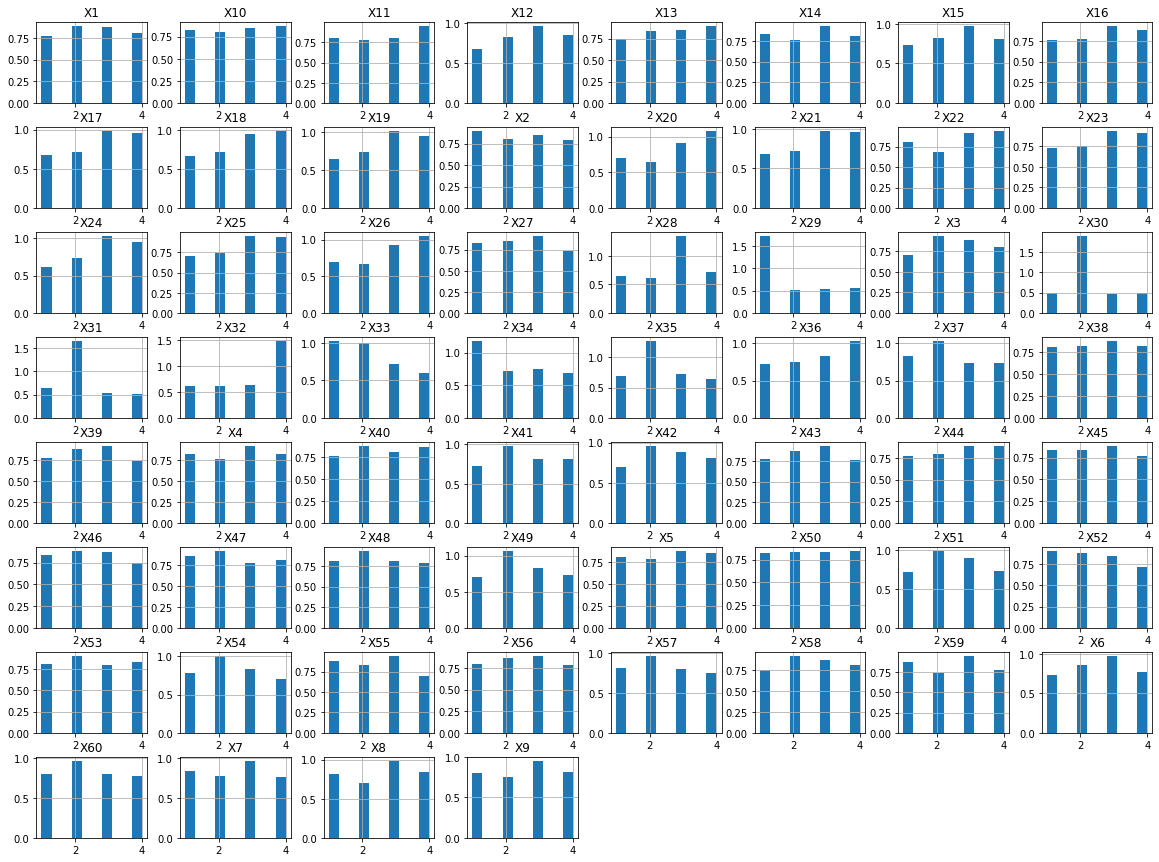

In [66]:
df.iloc[:,1:].hist(density=True);

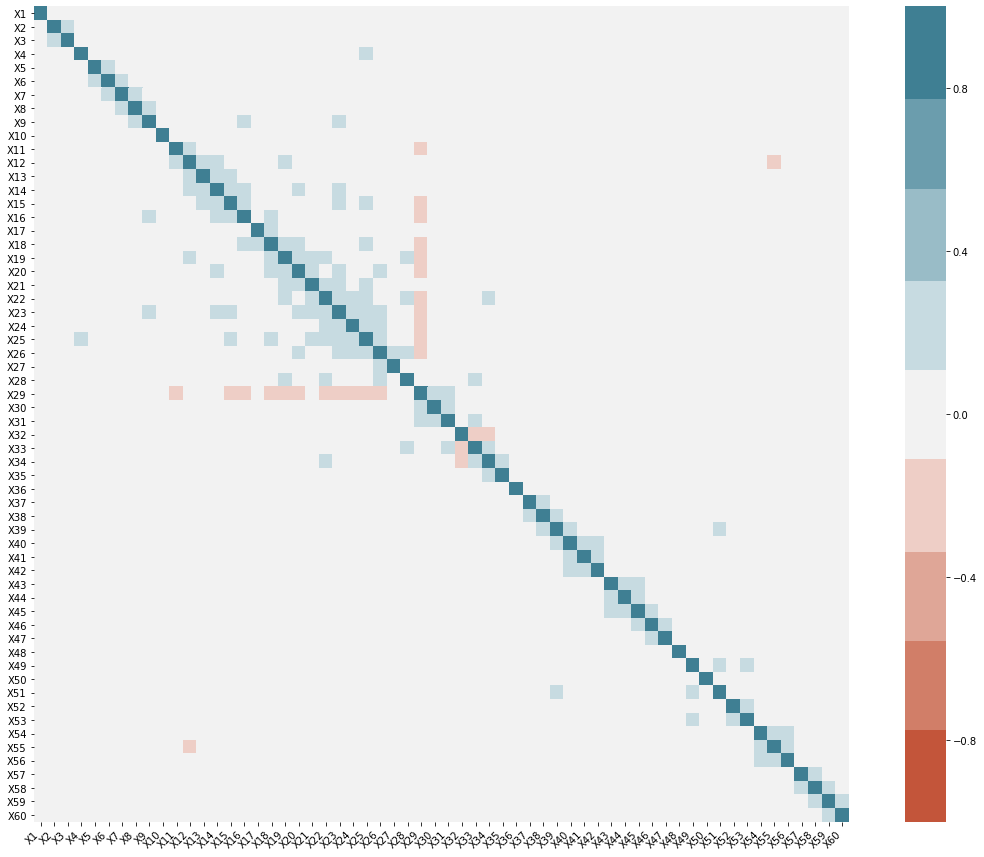

In [28]:
corr = df.iloc[:,1:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- independant variables are uncorrelated

In [46]:
corr_matrix = df.corr()
corr_matrix['X0'].sort_values(ascending=False)

tgt    1.000000
X0     1.000000
X29    0.465126
X31    0.282489
X30    0.232128
X34    0.186456
X33    0.183558
X35    0.052308
X51    0.051346
X53    0.050738
X48    0.045399
X37    0.038473
X49    0.036807
X52    0.036344
X27    0.036029
X54    0.033772
X45    0.032723
X56    0.028487
X41    0.022606
X55    0.018635
X59    0.017440
X46    0.009658
X57    0.000705
X38   -0.001270
X42   -0.007748
X50   -0.010149
X44   -0.010175
X8    -0.017008
X58   -0.019131
X40   -0.019174
         ...   
X7    -0.027951
X43   -0.028904
X1    -0.029659
X3    -0.041311
X4    -0.043044
X60   -0.049310
X9    -0.053623
X10   -0.054231
X39   -0.054467
X2    -0.058548
X13   -0.065169
X5    -0.068306
X17   -0.074477
X14   -0.077740
X12   -0.085612
X15   -0.091522
X36   -0.102695
X11   -0.104891
X20   -0.118073
X21   -0.118720
X24   -0.122447
X28   -0.123667
X26   -0.140162
X16   -0.144197
X19   -0.148070
X18   -0.150203
X23   -0.152366
X22   -0.168927
X25   -0.188069
X32   -0.314405
Name: X0, Length: 62, dt

In [20]:
df['tgt'] = [1 if x==1 else 0 for x in df.iloc[:,0]]

In [41]:
def train_test_split(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    train_indices = shuffled_indices[:test_size]
    test_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

X_train,X_test = train_test_split(df.iloc[:,1:61],0.2)
y_train,y_test = train_test_split(df['tgt'],0.2)

Text(0, 0.5, 'Testing Accuracy')

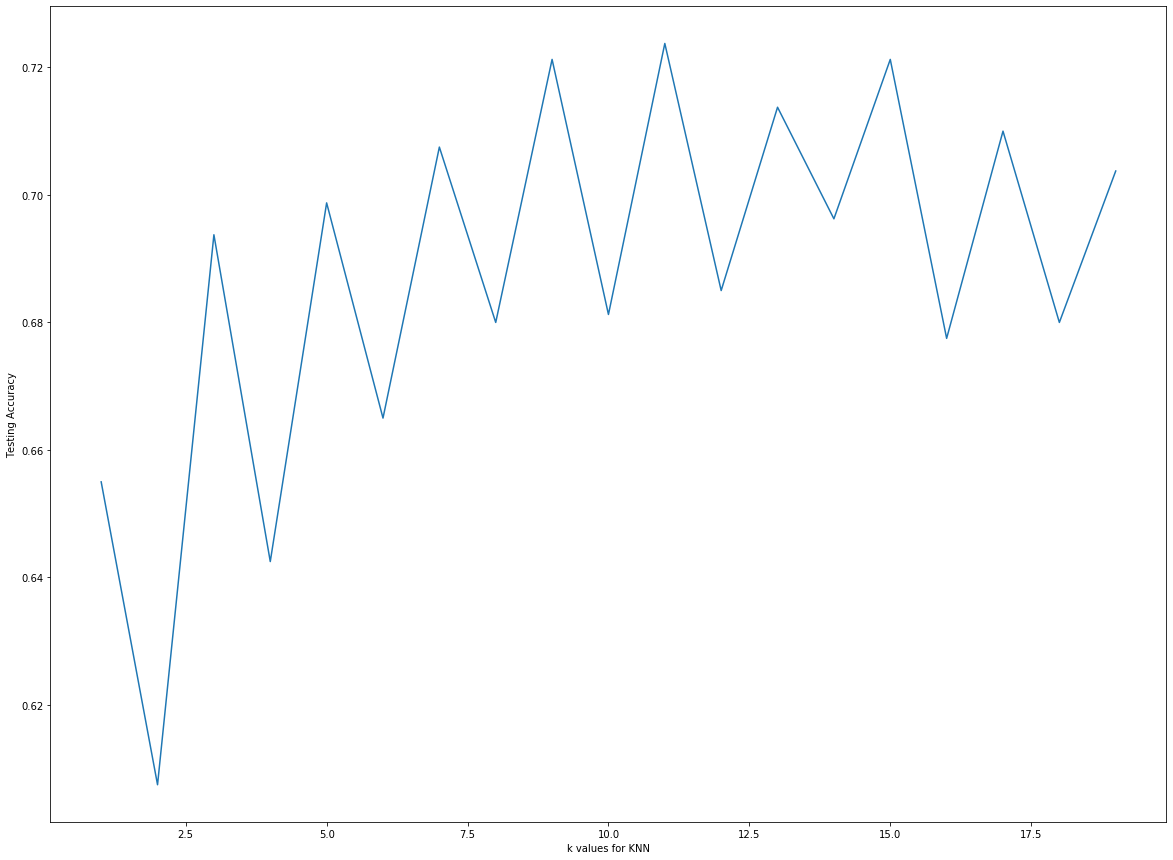

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred) 
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range,scores_list);
plt.xlabel("k values for KNN")
plt.ylabel("Testing Accuracy")

   ## Performance on test data

In [23]:
for i in range(1,61):
    dft.iloc[:,i]=[float(x.split(":")[1]) for x in dft.iloc[:,i]]
dft['tgt'] = [1 if x==1 else 0 for x in dft.iloc[:,0]]

In [24]:
X_test2 = dft.iloc[:,1:61]
y_test2 = dft['tgt']

In [33]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test2)
print("KNN (k=11): Accuracy(train) = ",metrics.accuracy_score(y_test2,y_pred))
print("Test: ")
print(metrics.classification_report(y_test2, y_pred))

KNN (k=11): Accuracy(train) =  0.7071264367816092
Test: 
              precision    recall  f1-score   support

           0       0.63      0.93      0.75      1044
           1       0.89      0.50      0.64      1131

    accuracy                           0.71      2175
   macro avg       0.76      0.72      0.70      2175
weighted avg       0.77      0.71      0.69      2175



In [47]:
df_total['Class'] = [1 if x==1 else 0 for x in df_total.iloc[:,0]]
df_total.tail()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,Class
2986,-1,4.0,4.0,4.0,3.0,3.0,1.0,3.0,3.0,3.0,...,2.0,4.0,2.0,4.0,2.0,1.0,4.0,1.0,NaN,0
2987,1,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,...,4.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,NaN,1
2988,1,4.0,2.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,...,2.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,NaN,1
2989,1,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,...,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,NaN,1
2990,-1,2.0,1.0,1.0,1.0,4.0,1.0,1.0,3.0,3.0,...,1.0,3.0,4.0,2.0,1.0,4.0,2.0,2.0,NaN,0


In [48]:
X_train,X_test = train_test_split(df_total.iloc[:,1:61],0.2)
y_train,y_test = train_test_split(df_total['Class'],0.2)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
1410,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,4.0,2.0,...,1.0,3.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,4.0
1915,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,1.0,4.0,...,2.0,2.0,1.0,2.0,4.0,4.0,1.0,1.0,2.0,1.0
785,3.0,2.0,2.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,...,3.0,4.0,4.0,3.0,2.0,2.0,3.0,3.0,1.0,2.0
2587,2.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,...,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0
324,3.0,3.0,1.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,1.0


In [81]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

X_train,X_test = train_test_split(df_total.iloc[:,1:61],0.2)
y_train,y_test = train_test_split(df_total['Class'],0.2)

In [78]:
def classifier(model,name):
    kfold = model_selection.KFold(n_splits=10, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    msg = name+" : Train -- %f (%f)" % (cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name,': Test  -- ',metrics.accuracy_score(y_test, predictions))
    print()
    print(metrics.classification_report(y_test, predictions))

In [82]:
model=AdaBoostClassifier()
name="Ensemble AdaBoost"
classifier(model,name)

Ensemble AdaBoost : Train -- 0.913079 (0.037941)
Ensemble AdaBoost : Test  --  0.9201838696197242

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1083
           1       0.93      0.93      0.93      1310

    accuracy                           0.92      2393
   macro avg       0.92      0.92      0.92      2393
weighted avg       0.92      0.92      0.92      2393



In [83]:
?dfs.append()

Object `dfs.append()` not found.


# Convolutional NNs to identify splice site junction in sequence

In [16]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
0,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,...,3.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,NaN
1,1,1.0,3.0,3.0,4.0,2.0,1.0,2.0,2.0,4.0,...,3.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,1.0,NaN
2,1,1.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,...,1.0,1.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,NaN
3,-1,1.0,1.0,4.0,1.0,1.0,3.0,3.0,4.0,4.0,...,3.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0,NaN
4,-1,4.0,3.0,4.0,4.0,3.0,1.0,1.0,4.0,4.0,...,3.0,2.0,1.0,4.0,2.0,1.0,1.0,4.0,4.0,NaN


In [18]:
df.drop("X61",axis=1,inplace=True)
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
0,1,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,...,2.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0
1,1,1.0,3.0,3.0,4.0,2.0,1.0,2.0,2.0,4.0,...,4.0,3.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,1.0
2,1,1.0,4.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,...,2.0,1.0,1.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0
3,-1,1.0,1.0,4.0,1.0,1.0,3.0,3.0,4.0,4.0,...,3.0,3.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0
4,-1,4.0,3.0,4.0,4.0,3.0,1.0,1.0,4.0,4.0,...,1.0,3.0,2.0,1.0,4.0,2.0,1.0,1.0,4.0,4.0


In [52]:
def getInstanceFromRow(row):
    onehot = np.zeros((1,2))
    if row[0] == 1:
        onehot[0][0] = 1 
    if row[0] == -1:
        onehot[0][1] = 1
    orth = np.zeros((60,4))
    for i in range(60):
        if row[i] == 1:
            orth[i][0] = 1
        elif row[i] == 2:
            orth[i][1] = 1
        elif row[i] == 3:
            orth[i][2] = 1
        elif row[i] == 4:
            orth[i][3] = 1
    return orth,onehot

In [25]:
raw_data = np.array(df)

In [26]:
raw_data.shape

(1000, 61)

In [27]:
raw_data[0]

array([1., 2., 1., 2., 1., 2., 1., 2., 3., 3., 3., 3., 1., 2., 1., 3., 4.,
       2., 1., 2., 2., 2., 1., 1., 2., 3., 1., 4., 2., 2., 1., 4., 2., 2.,
       1., 4., 2., 2., 1., 2., 1., 1., 2., 2., 1., 4., 2., 3., 3., 4., 3.,
       2., 3., 4., 2., 2., 2., 2., 1., 3., 4.])

In [53]:
x = []
y = []
for i in range(raw_data.shape[0]):
    xi,yi=getInstanceFromRow(raw_data[i])
    x.append(xi)
    y.append(yi)
x = np.array(x)
y = np.array(y)

In [43]:
x.shape

(1000, 60, 4)

In [61]:
x = np.swapaxes(x,1,2)
x.shape

(1000, 4, 60)

In [54]:
y.shape

(1000, 1, 2)

In [57]:
y[0]

array([[1., 0.]])

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D
from keras import backend as K
K.set_learning_phase(True)

Using TensorFlow backend.


In [58]:
model = Sequential()
model.add(Conv1D(8, 2, input_shape=(None, 60), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling1D())
model.add(Conv1D(16, 2, padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling1D())
model.add(Dense(2, name='fc1'))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(x, y, epochs=30, batch_size=32, validation_split=0.1, shuffle=True)
K.set_learning_phase(False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 900 samples, validate on 100 samples
Epoch 1/30





900/900 [==============================] - 2s 3ms/step - loss: 0.7019 - acc: 0.4956 - val_loss: 0.6961 - val_acc: 0.5400
Epoch 2/30
900/900 [==============================] - 0s 216us/step - loss: 0.6735 - acc: 0.5511 - val_loss: 0.6803 - val_acc: 0.5100
Epoch 3/30
900/900 [==============================] - 0s 209us/step - loss: 0.6529 - acc: 0.6122 - val_loss: 0.6668 - val_acc: 0.5400
Epoch 4/30
900/900 [==============================] - 0s 358us/step - loss: 0.6200 - acc: 0.6511 - val_loss: 0.6392 - val_acc: 0.6500
Epoch 5/30
900/900 [==============================] - 0s 278us/step - loss: 0.5922 - acc: 0.6822 - val_loss: 0.6297 - val_acc: 0.6500
Epoch 6/30
900/900 [==============================] - 0s 419us/step - loss: 0.5521 - acc: 0.7244 - val_loss: 0.5592 - val_acc: 0.7100
Epoch 7/30
900/900 [==============================